<a href="https://colab.research.google.com/github/Pratik872-bit/deep-learning-model/blob/main/pratik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8572 - loss: 0.4828 - val_accuracy: 0.9578 - val_loss: 0.1413
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9561 - loss: 0.1511 - val_accuracy: 0.9707 - val_loss: 0.0960
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9663 - loss: 0.1108 - val_accuracy: 0.9736 - val_loss: 0.0873
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9739 - loss: 0.0901 - val_accuracy: 0.9767 - val_loss: 0.0761
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9756 - loss: 0.0762 - val_accuracy: 0.9771 - val_loss: 0.0740
313/313 - 0s - 1ms/step - accuracy: 0.9771 - loss: 0.0740

✅ Test Accuracy: 0.9771


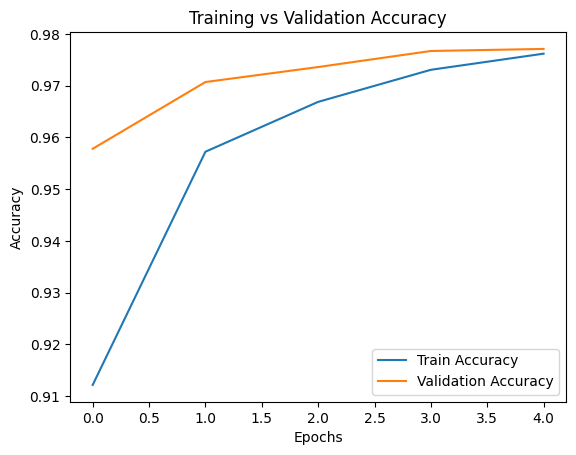

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step

Predicted labels: [7 2 1 0 4]
True labels:      [7 2 1 0 4]


In [1]:
# Step 1: Import libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Step 2: Load dataset (MNIST - handwritten digits)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values (0–255 → 0–1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Step 3: Build a simple model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),   # Flatten 28x28 image → 784 vector
    layers.Dense(128, activation='relu'),   # Hidden layer
    layers.Dropout(0.2),                    # Dropout for regularization
    layers.Dense(10, activation='softmax')  # Output layer (10 classes)
])

# Step 4: Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Step 6: Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

# Step 7: Plot training results
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.show()

# Step 8: Predict some digits
predictions = model.predict(x_test[:5])
print("\nPredicted labels:", predictions.argmax(axis=1))
print("True labels:     ", y_test[:5])
